- Remember that the cost function gives us a way to ,measure how well a specific set of parameters fits the training data. Thereby gives us a way to ry to choose better parameters.
- Squared error cost function is not an ideal cost function for logistic regression.
- 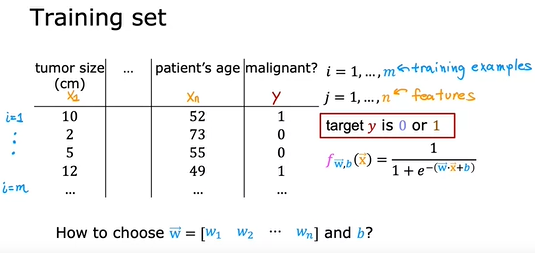
- For linear regression squared error cost function is used. 
     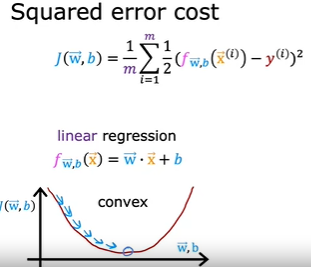
- Now, we could try to use the same cost function for logistic regression.
- But the logistic regression will prodduce non-convex cost function. This means that if we were to try to use gradient descent. There are lots of local minima that we can get sucking. This turns out that for logistic regression, this squared error cost function is not a good choice.
    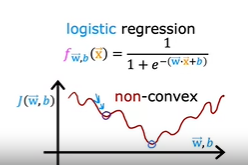
- Instead, there will be a different cost function that can make the cost funcion convex again. The gradient decent can be guaranteed to converge to the global minimum.
- Remeber, the loss function measures how well we're doing on one training examples and is by summing up the losses on all the training examples that we then get, the cost function, which measure how well we're doing on the entire training set.
    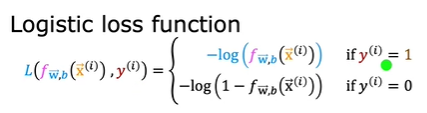
- Loss when y = 1
    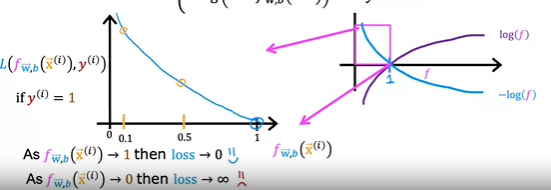
    - If the algorithm predicts a probability close to 1 and the true label is 1, then loss is very small.
    - If the algorithm predicts 0.5, then loss is a it higheer but not that high.
    - If the algorithm were to have output at 0.1, if it thinks that there is only a 10% chance of the tumor being maligannt but y really is 1. Then the loss is much higher.
- Loss when y = 0
    - 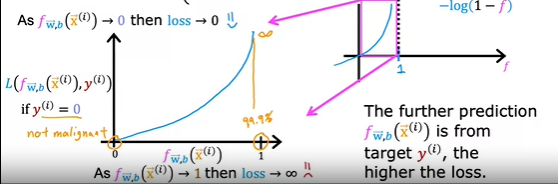
- It turns out that with this choice of loss function, the overall cost function will be convex and thus we can reliably use gradient descent to take us to the global minimum.
    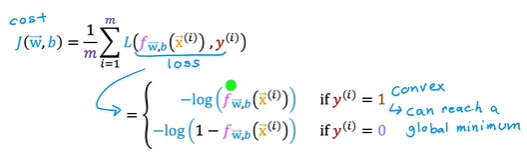

## LAB : Logistic Regression, Logistic Loss
- Explore the reason the squared error loss is not appropirate for logistic regression
- Explore the logistic loss function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Squared error for Logistic Regression
- For linear regression we have used the squared error cost function. 
- The equation for the squared error cost with one variable is : 
   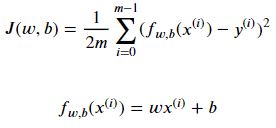
- 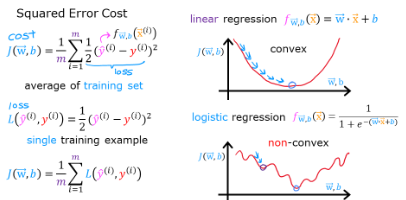
- The squared error cost had the nice property that following the derivative of cost leads to minimum
    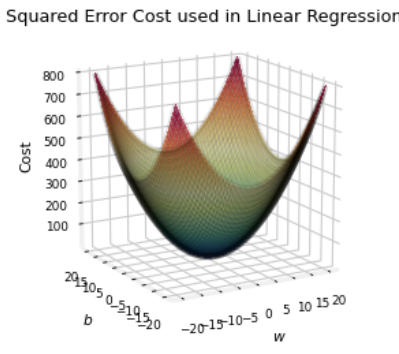
- This cost function worked well for linear regression. However, as the slide above points out f_wb(x) now has a non-linear component, the sigmoid function f_w,b(x) = sigmoid(wx+b)
- Let's get a surface plot of the cost using a squared error cost.
    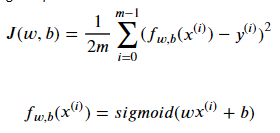
- 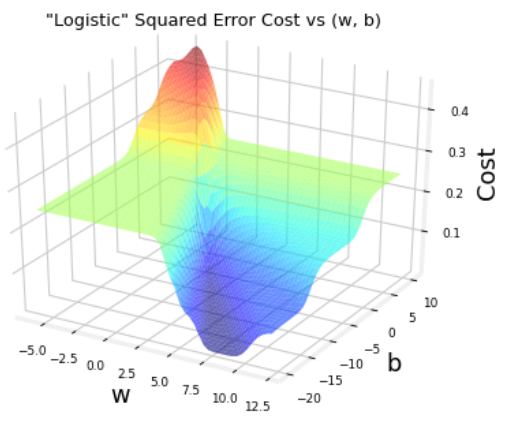
- While this produced a pretty intresting plot, the surface above not nearly as smooth as the 'soup bowl' from linear regression.
- Logistic regresion requires a cost function more suitable to its non-linenar nature. 
- 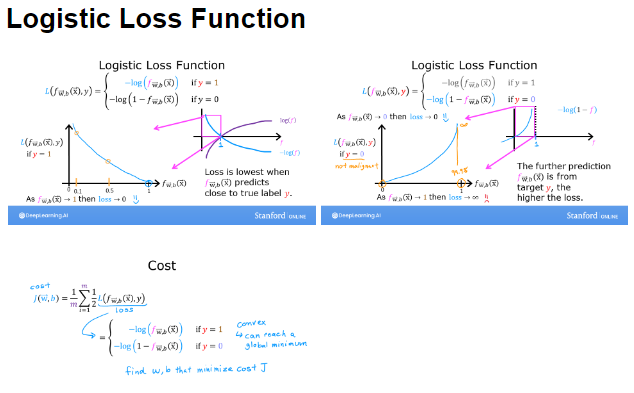
- Logistic Regression uses a loss function more suited to the task of categorization where the target is 0 or 1 rather than any number. 
- Loss is a measure of the difference of a signle example to its target value while the cost is the measure of the losses over the training set.
- This is defined : 
    - loss is the cost for a singe data point, which is
        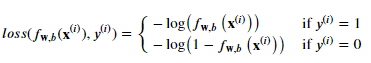
    - f_w,b(xi) is the model's prediction, while yi is the target value.
    - f_w,b(xi) = g(w.xi + b) where function g is the sigmoid function.
- The defining feature of this loss function is the fact that it used 2 separate curves. One for the case when the target is zero or (y = 0) and another for  when target is one (y = 1). Combined, these curves provide the behavior useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target
    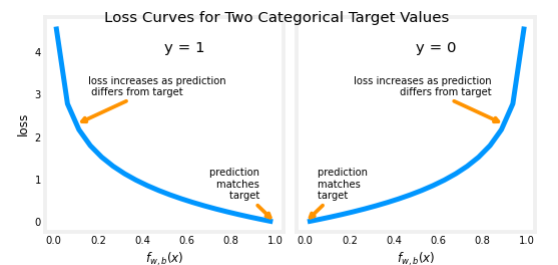
- Combined the curves are similar to the quadratic curve of the squared error loss. Note the x-axis is f_w,b which is output of a sigmoid. The sigmoid output is strictly b/w 0 and 1.

- The loss function can be rewritten to be easier to implement.
    
- One can consider the equationn in 2 pieces
    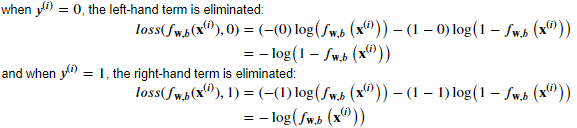
- This curve is well suited to gradient descent. It does not have plateaus, local minima or discontinuities. Note, it is not a bowl as in the case of sqaured error. Bothe the cost and the log(cost) are plotted to illuminate the fact tht the curve, when the cost is small, has a slope and continues to decline.
    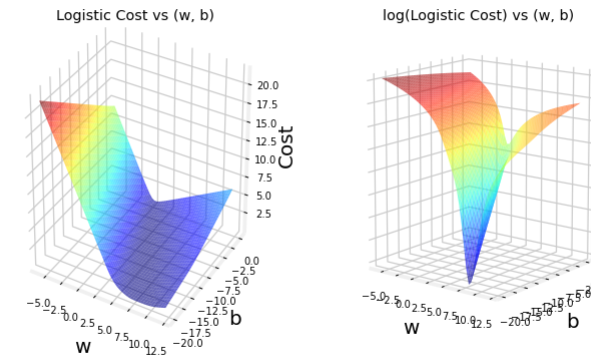

## Simplified Cost Function for Logistic Regression
- The loss function is defined as
    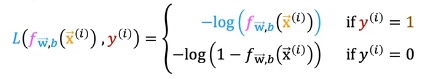
- We can write the loss function as follows : 
    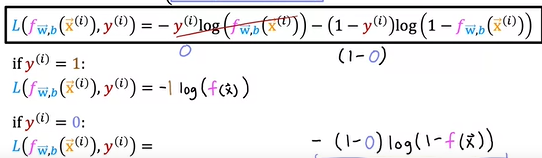
- The cost J is just the average loss, average across the entire training set of m examples.
    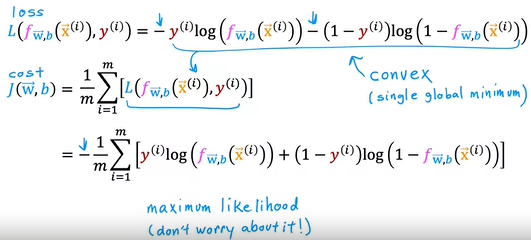
- This cost function has the nice property that it is convex.


## LAB : Cost Function for Logistic Regression
- Examine the implementation and utilize the cost funtion for logistic regression.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1]) 

In [18]:
pos = y_train == 1
neg = y_train == 0

In [19]:
X_train[pos][:, 0]

array([3., 2., 1.])

In [20]:
X_train[pos][:, 1]

array([0.5, 2. , 2.5])

In [21]:
X_train[neg][:, 0]

array([0.5, 1. , 1.5])

In [22]:
X_train[neg][:, 1]

array([1.5, 1. , 0.5])

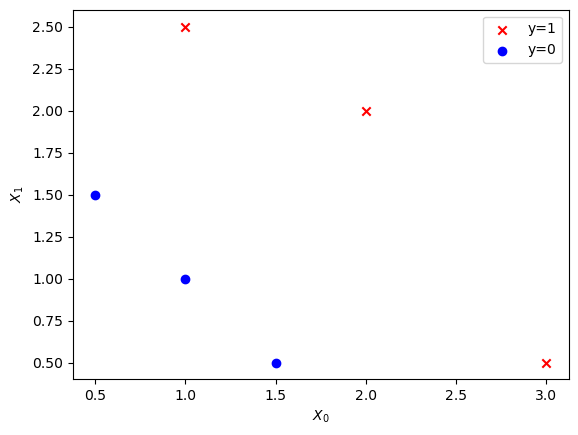

In [28]:
plt.scatter(X_train[pos][:, 0], X_train[pos][:, 1], marker='x', c='red', label='y=1')
plt.scatter(X_train[neg][:, 0], X_train[neg][:, 1], marker='o', c='blue', label='y=0')
plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.legend()
plt.show()

### Cost Function
- Loss is defined to apply to one example. Here we combine the losses to form the cost, which includes all the examples.
- For logistic Regression, the cost function is of the form
    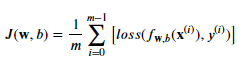
    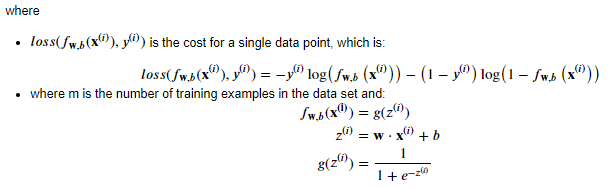

In [29]:
def sigmoid(z):
    '''compute the sigmoid of z
    
    Args : 
        z (ndarray) : A Scalar, numpy of any size.
        
    Retrurns : 
        g (ndarray) : sigmoid(z), with the same shape as z
    '''
    
    g = 1/(1+np.exp(-z))
    return g

In [30]:
def compute_cost_logistic(X, y, w, b):
    '''
    Computes Cost
    
    Args : 
        X (ndarray (m, n)) : Data, m examples with n features
        y (ndarray (m, )) : Target values
        w (ndarray (n, )) : Model Parameters
        b (scalar) : Model Parameter
        
    Returns : 
        cost (scalar) : cost
    '''
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1 - f_wb_i)
    
    cost = cost / m
    return cost

In [32]:
w_tmp = np.array([1, 1])
b_tmp = -3
compute_cost_logistic(X_train, y_train, w_tmp, b_tmp)

0.36686678640551745

#### Example
- Now, let's see what the cost function output is for a different value of w

Let's first plot the decision boundary for these two different $b$ values to see which one fits the data better.

* For $b = -3, w_0 = 1, w_1 = 1$, we'll plot $-3 + x_0+x_1 = 0$ (shown in blue)
* For $b = -4, w_0 = 1, w_1 = 1$, we'll plot $-4 + x_0+x_1 = 0$ (shown in magenta)

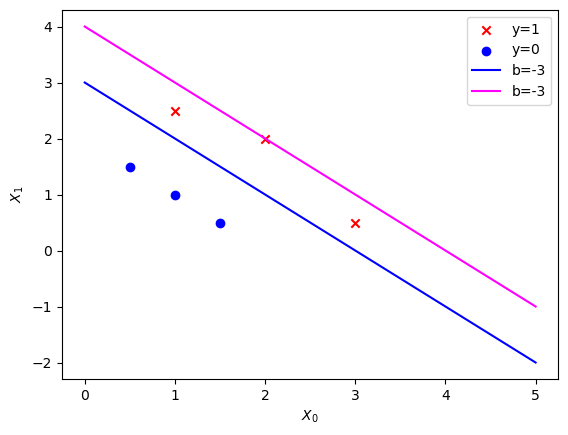

In [43]:
# Choose values b/w 0 and 6
x0 = np.arange(0, 6)

# Plot the 2 decision boundaries
x1 = 3-x0
x1_other = 4-x0

plt.scatter(X_train[pos][:, 0], X_train[pos][:, 1], marker='x', c='red', label='y=1')
plt.scatter(X_train[neg][:, 0], X_train[neg][:, 1], marker='o', c='blue', label='y=0')
plt.plot(x0, x1, c = 'blue', label= 'b=-3')
plt.plot(x0, x1_other, c = 'magenta', label= 'b=-3')

plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.legend()
plt.show()

- We can see from this plot that b = -4, w = np.array([1, 1]) is a worst model for the training data.

In [46]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461
